In [1]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

from tensorflow.keras.models import load_model
from sklearn.metrics import classification_report, confusion_matrix, roc_curve, auc

# Load image data for testing
from tensorflow.keras.preprocessing.image import ImageDataGenerator


In [3]:
# Define path
IMG_WIDTH, IMG_HEIGHT = 224, 224
BATCH_SIZE = 32

base_dir = os.path.abspath(os.path.join(os.getcwd(), "..", "data"))
test_dir = os.path.join(base_dir, "test")

# Load the best saved model
model = load_model("best_vgg16_model.h5")


In [4]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=(IMG_HEIGHT, IMG_WIDTH),
    batch_size=BATCH_SIZE,
    class_mode='binary',
    shuffle=False  # important for correct label prediction
)


Found 624 images belonging to 2 classes.


In [5]:
# Predict probabilities
pred_probs = model.predict(test_generator)

# Convert probabilities to binary predictions
y_pred = (pred_probs > 0.5).astype(int).ravel()
y_true = test_generator.classes


20/20 [==============================] - 25s 1s/step


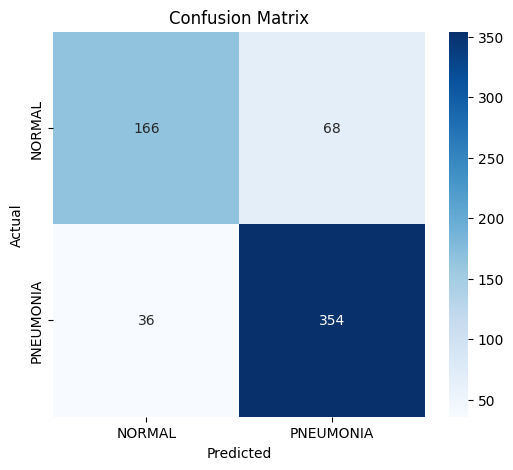

Classification Report:
              precision    recall  f1-score   support

      NORMAL       0.82      0.71      0.76       234
   PNEUMONIA       0.84      0.91      0.87       390

    accuracy                           0.83       624
   macro avg       0.83      0.81      0.82       624
weighted avg       0.83      0.83      0.83       624



In [6]:
# Confusion matrix
cm = confusion_matrix(y_true, y_pred)
labels = list(test_generator.class_indices.keys())

plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

# Classification report
print("Classification Report:")
print(classification_report(y_true, y_pred, target_names=labels))


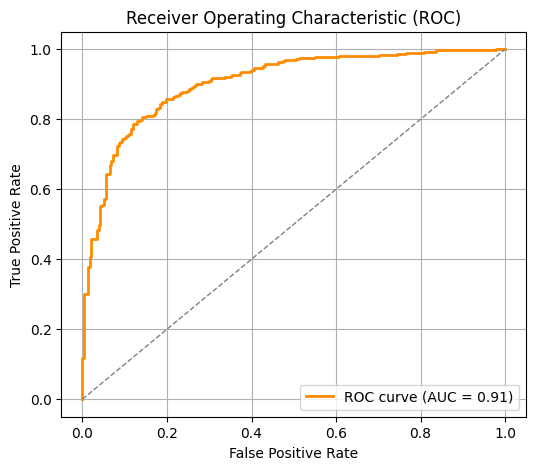

In [7]:
fpr, tpr, thresholds = roc_curve(y_true, pred_probs)
roc_auc = auc(fpr, tpr)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (AUC = {:.2f})'.format(roc_auc))
plt.plot([0, 1], [0, 1], color='gray', lw=1, linestyle='--')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("Receiver Operating Characteristic (ROC)")
plt.legend(loc="lower right")
plt.grid()
plt.show()


1/1 [==============================] - 0s 113ms/step


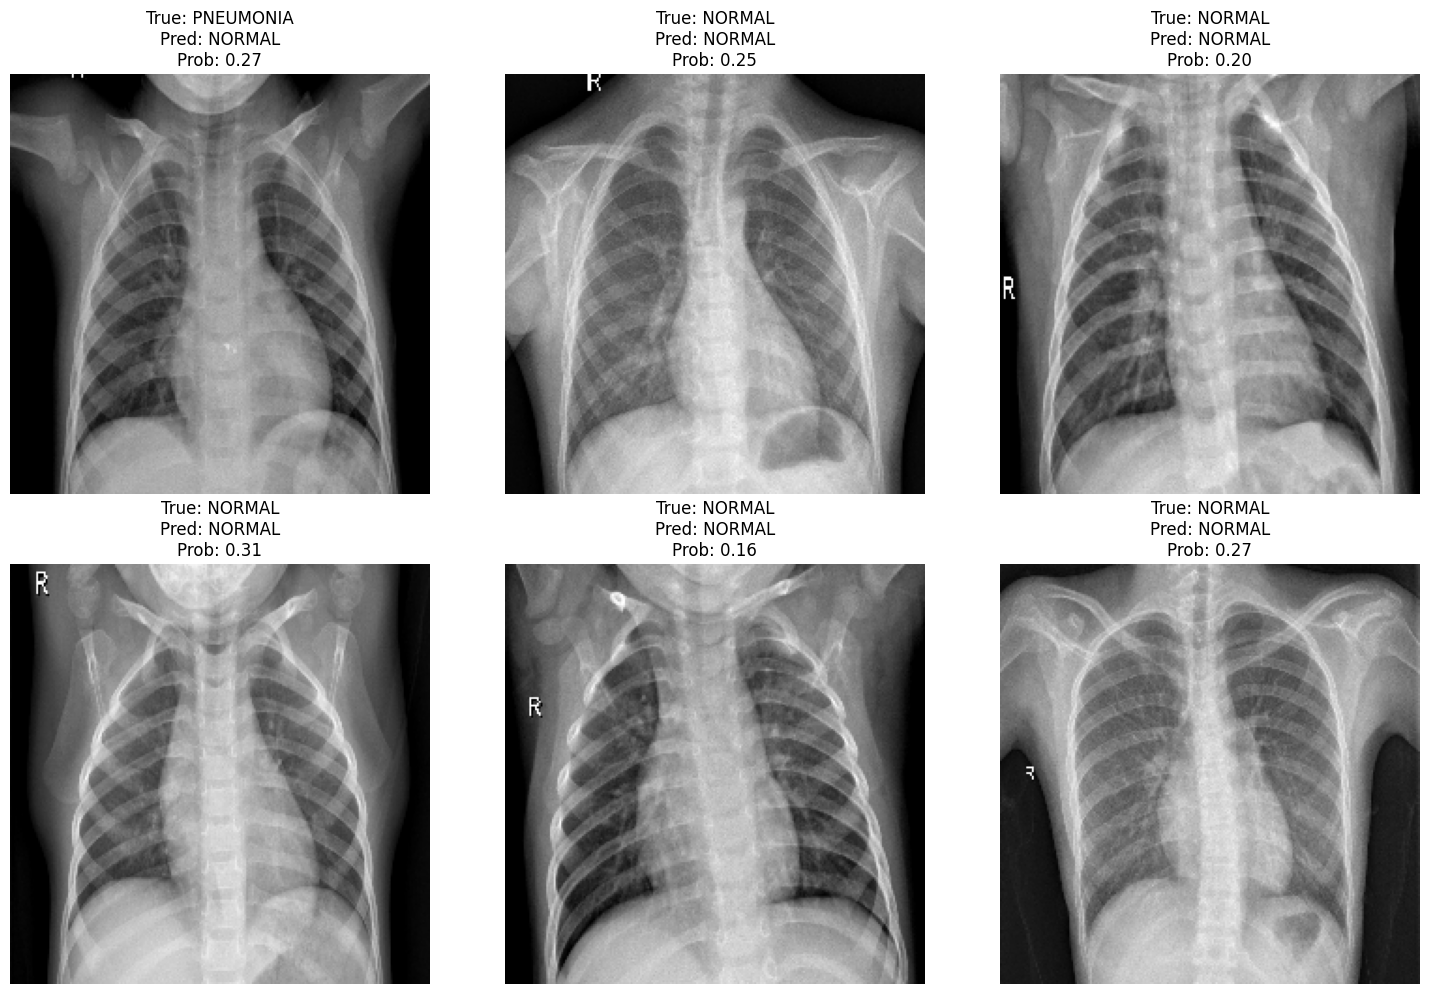

In [8]:
import random
from tensorflow.keras.utils import load_img, img_to_array

# Get the file paths of all test images
test_image_files = test_generator.filepaths
class_labels = list(test_generator.class_indices.keys())

# Pick 6 random test images
random_indices = random.sample(range(len(test_image_files)), 6)

plt.figure(figsize=(15, 10))

for i, idx in enumerate(random_indices):
    img_path = test_image_files[idx]
    
    # Load and preprocess image
    img = load_img(img_path, target_size=(IMG_HEIGHT, IMG_WIDTH))
    img_array = img_to_array(img) / 255.0
    img_array = np.expand_dims(img_array, axis=0)
    
    # Predict class
    pred_prob = model.predict(img_array)[0][0]
    pred_class = class_labels[int(pred_prob > 0.5)]
    true_class = class_labels[y_true[idx]]
    
    # Plot the image
    plt.subplot(2, 3, i+1)
    plt.imshow(img)
    plt.axis('off')
    plt.title(f"True: {true_class}\nPred: {pred_class}\nProb: {pred_prob:.2f}")

plt.tight_layout()
plt.show()
